# DMML-02

Fejlesztői környezet; további EDA módszerek; naiv hipotézisvizsgálat;
adatelőkészítés, -feldolgozás.

Apagyi Dávid  
2025-09-18

**Honlap:** <a href="https://apagyidavid.web.elte.hu/2025-2026-1/dmml"
target="_blank">apagyidavid.web.elte.hu/2025-2026-1/dmml</a>

<a target="_blank" href="https://colab.research.google.com/github/dapagyi/dmml-web/blob/notebooks/dmml-02.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ajánlott fejlesztői környezet

Én ezeket használom, ajánlom:

-   WSL2 (Windows Subsystem for Linux), Debian
-   uv (package and project management)
-   VS Code, Copilot

Ezek közül legalább a VS Code és az uv telepítését erősen javaslom. (A
WSL2 mellőzhető, a Copilot pedig integrálva van a VS Code-ba.)

Néhány hasznos link ezekhez:

-   [How to install Linux on Windows with
    WSL](https://learn.microsoft.com/en-us/windows/wsl/install)
-   [Remote development in
    WSL](https://code.visualstudio.com/docs/remote/wsl-tutorial)
-   [Developing in WSL](https://code.visualstudio.com/docs/remote/wsl)
-   [uv](https://docs.astral.sh/uv/)
-   [Jupyter Notebooks in VS
    Code](https://code.visualstudio.com/docs/datascience/jupyter-notebooks)
-   [Python debugging in VS
    Code](https://code.visualstudio.com/docs/python/debugging)
-   [GitHub Copilot in VS
    Code](https://code.visualstudio.com/docs/copilot/overview)

A legutolsó link elég jól szemlélteti, hogy miért érdemes ezek
beállításába egy kevés energiát fektetni.

# További EDA módszerek

*Előzmény:* előző óra (`pandas` gyakorlás és megoldások).

Néhány további EDA, azaz *Exploratory Data Analysis* (“feltáró
adatelemzés” (?)) módszert fogunk alkalmazni a Titanic adathalmazon.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("https://apagyidavid.web.elte.hu/2025-2026-1/dmml/data/titanic.csv")
df = df.rename({"Parch": "ParCh"})
df.head()

## Kategorikus változók, további hasznos `pandas` funkciók

A `Cabin` oszlopról hasznos információk érhetők el [ebben az
elemzésben](https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial?scriptVersionId=27280410&cellId=22)
(1.2.4 szakasz):

Contingency table (cross tabulation, crosstab; magyarul leginkább
kontingenciatáblázat/-tábla):

In [2]:
pd.crosstab(df["Sex"] ,df["Pclass"], values=df["Fare"], aggfunc="mean")

Pivottal ugyanez:

In [3]:
pd.pivot_table(df, index=["Sex"], columns=["Pclass"], values="Fare", aggfunc="mean")

Ha szükségünk van egy egyszerű – de nem túl szép – vizualizációra, akkor
közvetlenül `pandas`-szal gyorsan készíthetünk egy ábrát (valójában a
`matplotlib`-et használja a háttérben):

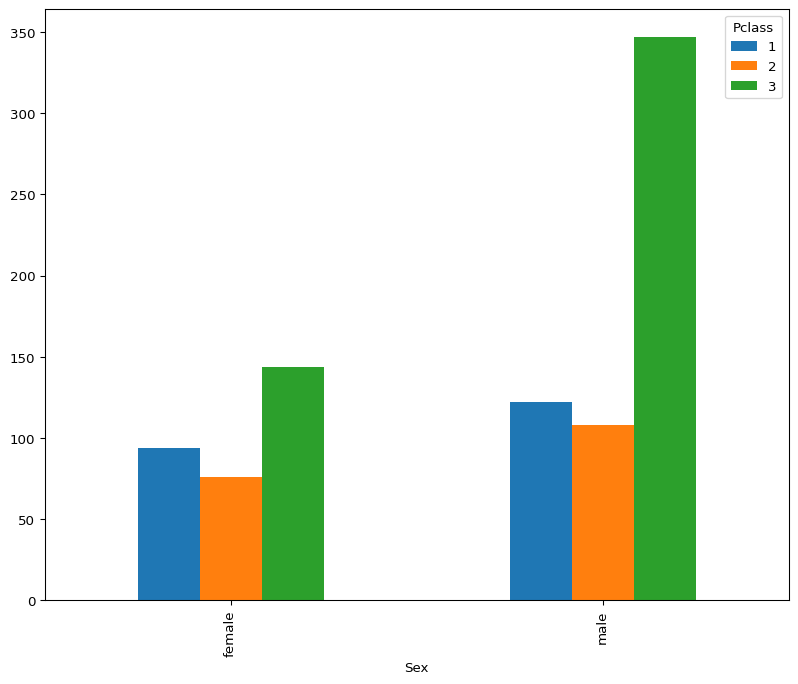

In [4]:
df.groupby("Sex")["Pclass"].value_counts().unstack().plot.bar(legend=True, figsize=(10, 8))

# Hipotézisvizsgálat

Gyakran hangoztatott nézet, hogy először a *nőket és a gyerekeket*
mentették ki a katasztrófa során. Egy másik gyakori megállapítás szokott
lenni az, hogy az *első osztályon utazó vendégek* előnyt élveztek a
mentés során.

Hipotézisvizsgálat formálisan a matematikai statisztika tárgyon lesz, mi
most csak naivan próbálunk meg feltárni hasonló összefüggéseket.

Fogalmazzunk meg és teszteljünk néhány hipotézist a túlélésre
vonatkozóan!

-   *1. hipotézis:* A nők előnyt élveztek a kimentés során, de azon
    belül is az első osztályon utazó hölgyek.
-   *2. hipotézis:* A túléléssel leginkább korreláló numerikus változó a
    kor.

Próbáljuk meg megválaszolni a kérdéseket!

## 1. hipotézis: első osztályon utazó hölgyek

Érdemes ellenőrizni, hogy mekkora létszámokról van szó, ugyanis ha
például nagyon kis elemszámú valamelyik vizsgált kategória, akkor nem
biztos, hogy van értelme egyáltalán a kérdésfelvetésnek.

In [5]:
df.pivot_table(index=["Sex"], columns=["Pclass"], values="Survived", aggfunc="count", margins=True)

Nincs túl kevés adat egyik kategóriában sem, tehát érdemes tovább
vizsgálódni.

In [6]:
df.pivot_table(index=["Sex"], columns=["Pclass"], values="Survived", aggfunc="mean", margins=True)

A fenti táblázatból több kézenfekvő megállapítás adódik:

-   A nők túlélési aránya 74.2%, a férfiaké 18.9%. (Az összes utasra
    vonatkoztatva 38.4% ez az érték).
-   Az első és második osztályon utazó nők túlélési aránya 96.8% és
    92.1%, a harmadik osztályon utazóké 50%.
-   A férfiak esetében is igaz az, hogy a magasabb osztályon utazók
    túlélési aránya nagyobb.

Ezek a megállapítások alátámasztják az 1. hipotézist.

> **Precízebb vizsgálat**
>
> Ha matematikailag korrektebb megállapításokat szeretnénk tenni, akkor
> statisztikai teszteket kell végeznünk. Néhány Wikipedia szócikk
> iránymutatásképpen:
>
> -   [Statistical hypothesis
>     test](https://en.wikipedia.org/wiki/Statistical_hypothesis_test)
> -   [Chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test)
> -   [Fisher’s exact
>     test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test)
> -   [Category:Statistical tests for contingency
>     tables](https://en.wikipedia.org/wiki/Category:Statistical_tests_for_contingency_tables)
> -   [Category:Statistical
>     tests](https://en.wikipedia.org/wiki/Category:Statistical_tests)

## 2. hipotézis: kor

Vizsgáljuk meg a kor eloszlását a túléltek és az elhunytak között!

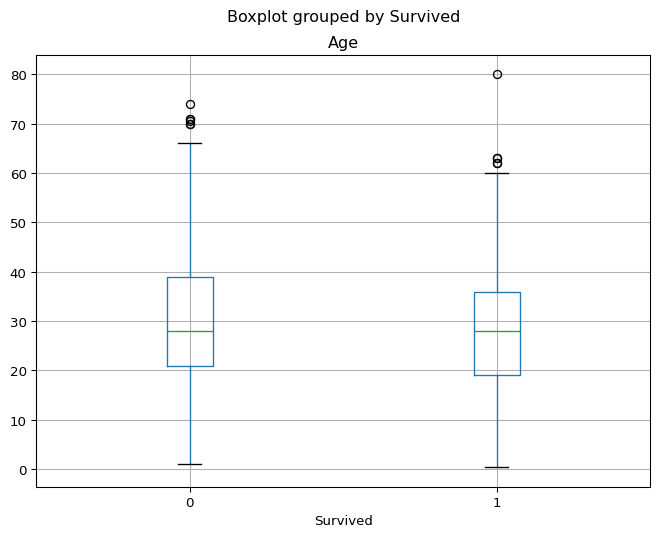

In [7]:
df.boxplot(column="Age", by="Survived", figsize=(8, 6))

In [8]:
df["Age"].groupby(df["Survived"]).describe()

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

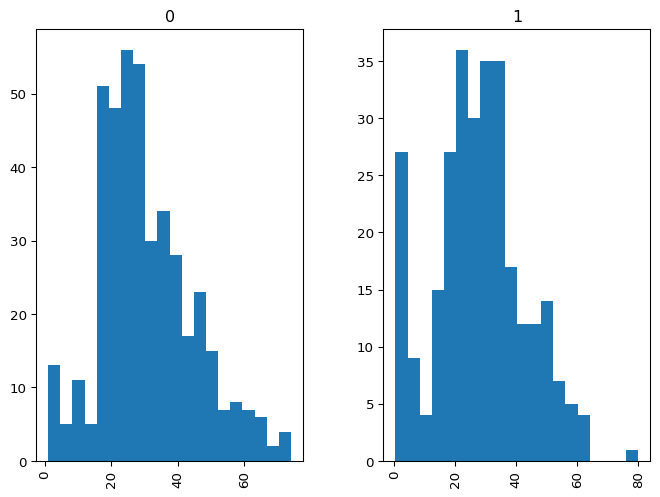

In [9]:
df.hist(column="Age", by="Survived", figsize=(8, 6), bins=20)

A fenti ábrák alapján elmondható, hogy a túlélők között valamivel több a
fiatalabb korú személy, de a különbség nem túl szembetűnő.

Korreláció (numerikus változókra között + plot):

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

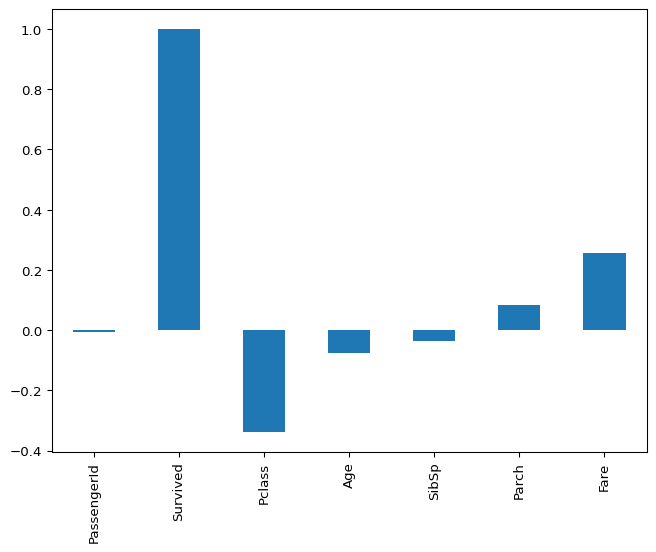

In [10]:
display(df.select_dtypes("number").corr()["Survived"])

df.select_dtypes("number").corr()["Survived"].plot(kind="bar", figsize=(8, 6))

A `Survived` oszloppal leginkább korreláló numerikus feature-ök a
`Pclass` (-0.34) és a `Fare` (0.26). Tehát minél magasabb osztályon
utazott valaki, annál nagyobb a megmenekülésének valószínűsége (a nemtől
függetlenül, lásd 1. hipotézis).

Nem várható, hogy mentéskor a jegy árát kérdezgették az emberektől. Ez a
klasszikus rejtett vagy harmadik változó esete: a vizsgált (független)
változó és a célváltozó (függő változó) között van egy harmadik
(rejtett) változó, amely a korrelációt okozza. Jelen esetben ezt
tudhatjuk is, a jegyár nyilvánvalóan az utas osztály függvénye:

In [11]:
df["Fare"].corr(df["Pclass"])

np.float64(-0.5494996199439074)

## Gyakorlás

Az elemzés során használj minél többféle órán látott módszert. Nézz
utána, milyen beállításokkal tudod még jobban kihasználni a `pandas`
(vagy `polars`) adta lehetőségeket.

1.  Vizsgáld meg egy (órán eddig nem vizsgált) kategorikus és egy
    folytonos, numerikus változó eloszlását, és ábrázold is egy
    megfelelő diagramon.

In [12]:
# TODO

1.  Hogyan hat a túlélés valószínűségére, ha egy családtagod utazott
    veled együtt (`SibSp` és `ParCh` oszlopok)? Fogalmazz meg előre egy
    hipotézist, és próbáld meg ellenőrizni. A kapott eredményhez készíts
    megfelelő vizualizációt és számolj statisztikákat. Mennyire tartod
    meglepőnek az eredményt? Mit gondolsz, ha kettő helyett négy
    oszlopunk lenne, külön a testvéreknek, házastársnak, szülőnek és
    gyereknek, hasonló eredményre jutnánk?

In [13]:
# TODO

1.  A `.query()` metódussal a sorokra lehet szűrni. Próbáld meg
    megérteni, jellemezni néhány grafikon segítségével a harmadosztályú
    utasokat.

In [14]:
# TODO

1.  Válassz egy oszlopot, pl. `Age` és vedd a `df["Age"]` `pd.Series`-t.
    Milyen műveleteket tudsz rajta elvégezni, amiket már egy
    `np.array`-en megszoktál? Meg tudod szorozni, tudod venni az
    átlagát, stb.? Találsz olyan műveletet, amit csak ezen lehet? És
    olyat, amit csak egy `np.array`-jel tudtál megcsinálni? Mi van, ha
    két oszlopot veszel, pl. `df[["Age", "Pclass"]]`? Mennyire
    viselkedik ez a típusú objektum egy többdimenziós `np.array`-hez
    hasonlóan?

In [15]:
# TODO

1.  Az alábbi művelet kilistázza azon utasokat, akiknek nem került
    semmibe a jegye:

``` python
df.query("Fare == 0")
```

Vizsgáld meg, hogy lehet-e ennek valami értelmes magyarázata, vagy
ezeket hibás (kiugró) értékekként kell kezelnünk. Pl. gyerek, és ezért
utazik ingyen, vagy valami családtaggal stb.

In [16]:
# TODO

# Adatelőkészítés, -feldologzás

-   [Kategorikus
    változók](https://en.wikipedia.org/wiki/Categorical_variable)
-   [Scikit-learn,
    preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
-   [Towards Data
    Science](https://towardsdatascience.com/categorical-feature-encoding-547707acf4e5#1056)

## Encoding

A modelleink többsége, amiket tanulni fogunk, numerikus adatokkal tud
csak dolgozni. A nem numerikus változók elkódolása (numerikus értékké
alakítása, *encoding*) ezért általában szükséges, mielőtt a
modellezéssel foglalkoznánk. Modellezzéssel csak a következő órán fogunk
foglalkozni, előtte most néhány egyszerűbb technikát tekintünk át.

### Numerikus változók

-   Binning: folytonos eloszlás diszkrétté tétele
-   Binary: egy küszöbértékhez viszonyított érték alapján

#### Binning

Folytonos változót *vödrökbe* rakjuk. Hívják ezért *grouping*nek és
*bucketing*nek is. Pl.

In [17]:
df["Age"].value_counts(bins=5)

(16.336, 32.252]    346
(32.252, 48.168]    188
(0.339, 16.336]     100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: count, dtype: int64

In [18]:
df["AgeBin"] = pd.cut(df["Age"], bins=[0, 12, 20, 30, 40, 50, 60, 70, 80, 90, 100], right=False)
df[["Age", "AgeBin"]].head(10)

Akár az `apply` metódust is használhatjuk:

In [19]:
def age_group_mapping(age: int) -> str | None:
    if age < 2:
        return "baby"
    if 2 <= age < 18:
        return "children"
    if 18 <= age < 30:
        return "youth"
    if 30 <= age < 50:
        return "adult"
    if 50 <= age:
        return "old"
    return None


display(df["Age"].apply(age_group_mapping).head())

df["AgeGroup"] = df["Age"].apply(age_group_mapping)
df["AgeGroup"].value_counts()

0    youth
1    adult
2    youth
3    adult
4    adult
Name: Age, dtype: object

AgeGroup
youth       271
adult       256
children     99
old          74
baby         14
Name: count, dtype: int64

Gyors vizualizáció:

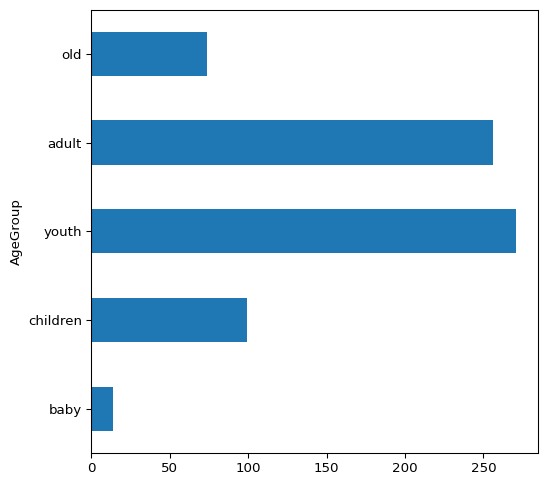

In [20]:
df["AgeGroup"].value_counts().reindex(["baby","children","youth","adult","old"]).plot.barh(figsize=(6, 6))

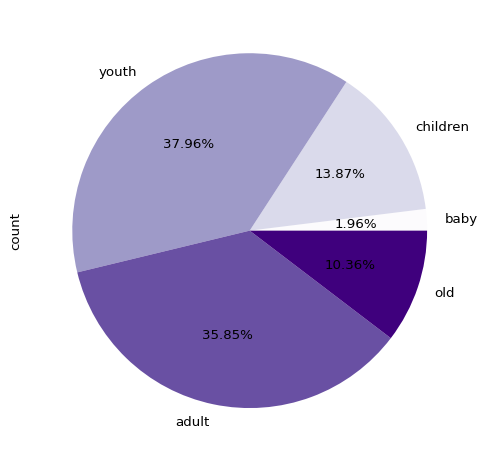

In [21]:
df["AgeGroup"].value_counts().reindex(["baby","children","youth","adult","old"]).plot.pie(autopct='%.2f%%', cmap="Purples", figsize=(6, 6))

> **Kördiagram**
>
> A kördiagram általában elég rossz vizualizációs módszer, most csak a
> `pandas` nyújtotta lehetőségek szemléltetésére használjuk.

#### Binary encoding

Ha egy folytonos, numerikus változót egy adott küszöbértékhez szeretnénk
viszonyítani.

In [22]:
threshold = df["Fare"].mean()
print(threshold)
df["FareCheap"] = (df["Fare"] < threshold).astype("int")

df.groupby("Pclass")["FareCheap"].value_counts(normalize=True).unstack()

32.204207968574636

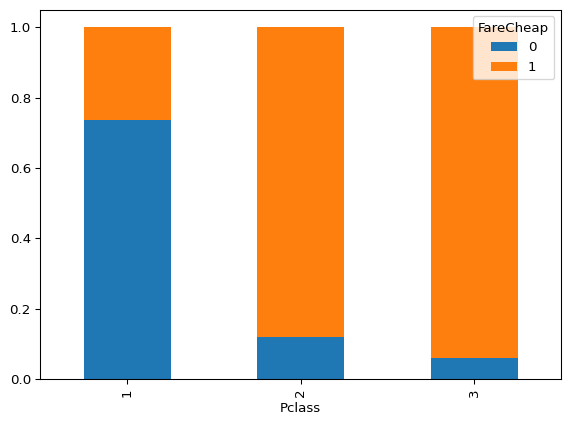

In [23]:
df.groupby("Pclass")["FareCheap"].value_counts(normalize=True).unstack().plot.bar(stacked=True)

In [24]:
pd.crosstab(df["Pclass"], df["FareCheap"], normalize="index")

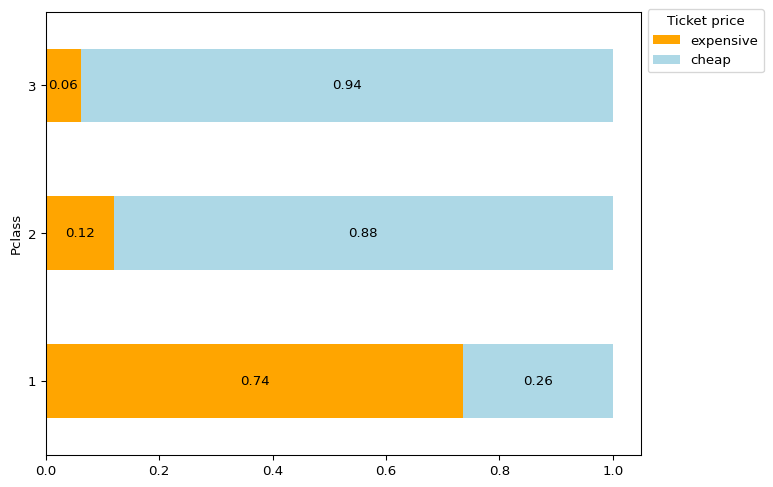

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

pd.crosstab(df["Pclass"], df["FareCheap"], normalize="index").plot.barh(
    stacked=True, color=["orange", "lightblue"], ax=ax
)

ax.legend(
    title="Ticket price",
    labels=["expensive", "cheap"],
    bbox_to_anchor=(1, 1.02),
    loc="upper left",
)

for container in ax.containers:
    ax.bar_label(container, label_type="center", fmt="%.2f")

plt.show()

### Kategorikus változók

-   One-hot encoding: minden egyes egyedi értékhez egy indikátor
    változót rendel
-   Label encoding: egyedi értékekhez rendelünk egyedi számot
    -   Ordinal: van értelme a sorrendnek
    -   Nominal: nincs értelme a sorrendnek

#### One-hot encoding

Dummy kódolásnak is nevezik. Nézzük az `Embarked` oszlopot! Három
lehetséges értéke az `S,C,Q`. Vegyünk 3 indikátor változót, nevezzük
őket `Embarked_S, Embarked_C, Embarked_Q`-nak. A szabály a következő: ha
`X` városban szállt be valaki, akkor `Embarked_X` értéke legyen 1, a
többié 0. Tehát például, ha valaki Southamptonban szállt fel, akkor
`Embarked_S=1`, `Embarked_C=0`, `Embarked_Q=0`. Ezen indikátor
változókat nevezzük dummy változóknak, a belőlük képzett vektort pedig
dummy vektornak. Ez előző esetben például a dummy vektor a következő
lenne: $[1,0,0]$. Az egyes oszlopok ekkor arra a kérdésre válaszolnak
valójában, hogy az illető `X` városban szállt-e fel.

In [26]:
df_dummy = pd.get_dummies(df, columns=["Embarked"], prefix="Embarked")
df_dummy.head()

In [27]:
cities = list(filter(pd.notna, df["Embarked"].unique()))
print(cities)

for city in cities:
    df[f"is_Embarked_{city}"] = (df["Embarked"] == city).astype("int")

print(list(filter(lambda col: "Embarked" in col, df.columns)))

df[["Embarked", "is_Embarked_S", "is_Embarked_C", "is_Embarked_Q"]].head()

['S', 'C', 'Q']
['Embarked', 'is_Embarked_S', 'is_Embarked_C', 'is_Embarked_Q']

Mindenhol egy darab egyes van?

In [28]:
all(df[["is_Embarked_S", "is_Embarked_C", "is_Embarked_Q"]].sum(axis=1) == 1)

False

Mik a problémás sorok? Hát azok, ahol hiányzik az `Embarked` érték.

In [29]:
df[df[["is_Embarked_S", "is_Embarked_C", "is_Embarked_Q"]].sum(axis=1) != 1]

In [30]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Vegyük észre, hogy az utolsó oszlopot akár el is lehet hagyni:
`Embarked_Q` pontosan akkor 1, ha a többi 0. (Hiszen az első $n-1$
indikátor változó meghatározza az $n$-diket, ha a rendszer teljes.)

#### Label encoding

Egy $n$ különböző értéket felvevő kategorikus változó értékeit 0-tól
$n-1$-ig terjedő skálán reprezentáljuk.

In [31]:
df["Embarked"].astype("category").cat.codes

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int8

Manuálisan is meghatározhatjuk a leképezést:

In [32]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
df["Embarked"].map(embarked_mapping)

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

Ha a kategóriáknak van természetes sorrendjük – például az `AgeGroup`
változó esetén –, akkor érdemes ezt figyelembe venni: ekkor *ordinal
encodingról* beszélünk.

> **Korreláció és kategorikus változók**
>
> Egy kategorikus változó numerikussá tétele után a `df.corr()` hívásban
> már ez a változó is szerepelni. Ez attól még *nem jelenti azt,* hogy
> az eredmény értelmes. Ha egy kategorikus változó (a szó köznapi
> értelmében) erősen korrelál egy másikkal, akkor különböző leképezések
> során különböző értéket fogsz kapni.

## Skálázás (Scaling)

Néha a numerikus értékeket szeretnénk átskálázni is (ha pl. a konkrét
érték helyett az egymáshoz viszonyított érték számít).

### Standarizálás

Ha adott egy $N(m,\sigma)$ normális eloszlású változó, érdemes lehet
standard normálissá transzformálni.

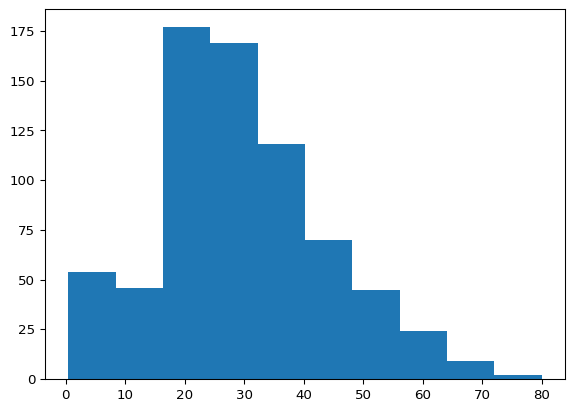

In [33]:
df["Age"].hist(grid=False)

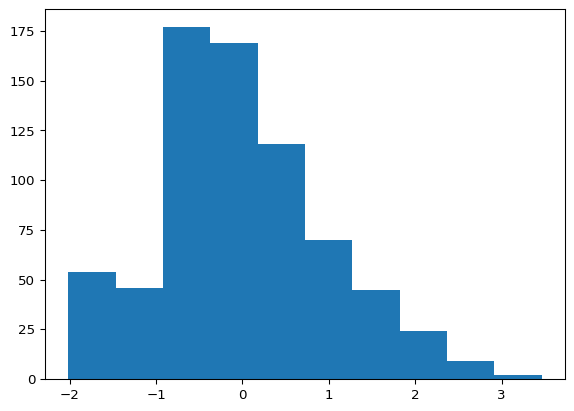

In [34]:
age_mean = df["Age"].mean()
age_std = df["Age"].std()
df["Age_standardized"] = (df["Age"] - age_mean) / age_std
df["Age_standardized"].hist(grid=False)

### Min-max skálázás

A változó értékeit egy lineáris leképezéssel a $[0,1]$ vagy esetleg a
$[-1,1]$ intervallumba képezzük.

## Gyakorlás

### Encoding

1.  A `Sex` kategorikus változót kódold el numerikus értékké! Milyen
    kódolást használtál? Lehet-e mást?

In [35]:
# TODO

1.  Az `Age` oszlopot az átlag helyett kódold el a *medián* szerint
    binárisan! Nézd meg, hogy az utasosztályok szerint milyen eloszlást
    kapsz!

In [36]:
# TODO

1.  Az *ordinal encoding* során a transzformálni kívánt változónak van
    egy *természetes* sorrendje (pl. napok, hónapok). Ekkor a kódolás
    során ezt szeretnénk megtartani. Jelen esetben ilyen például az
    `AgeGroup` változó. Alakítsd át numerikus értékké a sorrend
    tiszteletben tartásával!

In [37]:
# TODO

1.  A `scikit-learn.preprocessing` modul nem csak a skálázásra, de az
    elkódolásra is tartalmaz beépített függvényt. A
    [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)
    segítségével ismételd meg az `Embarked` oszlop órán látott Label
    encoding változatát!

In [38]:
# TODO

1.  Készíts egy vezetéknév oszlopot és nézd nézd meg a leggyakoribb
    neveket. A vezetéknév kinyeréséhez figyeld meg, hogy mindenki
    vezetékneve vesszővel elválasztva szerepel a `string` elején.
    Ismered a megfelelő python parancsot erre? Ha nem, nézd meg, hogy
    mit csinál `.split(",")` parancs az oszlop egy tetszőleges elemén.

In [39]:
# TODO

1.  Kódold el az `Age` oszlopot a kvartilisek alapján! Használd a
    `quantile` vagy `percentile` függvényeket. Milyen típusú kódolás ez?
    Mit gondolsz, milyen modellek esetén érdemes így elkódolni egy
    adatot, és mikor felesleges, sőt hátrányos?

In [40]:
# TODO

1.  A *target encoding* során egy kategorikus változót aszerint kódolunk
    el, hogy a *célváltozónak mennyi az átlaga* a változó adott
    szintjén. Készítsd el az `Embarked` oszlop target encode-olt
    változatát. Mi ennek a kódolásnak a hátránya? Érdemes szerinted
    használni?

In [41]:
# TODO